In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Mounted at /content/drive
drive  sample_data
/content
done


In [ ]:
cd "/content/drive/My Drive/UIA/Snowball"

/content/drive/My Drive/UIA/Snowball


In [ ]:
import pandas as pd


In [ ]:
ls

AlarmignessPrediction.ipynb      SnowballLayer2Reviews1.csv
CrawlReviews.ipynb               SnowballLayer2Reviews2.csv
GetSimilarApps_FirstLayer.ipynb  SnowballLayer2Reviews3.csv
lib/                             SnowBallTill15kLayer2.db
ReviewsData/                     SnowBallTill25kLayer2.db
Rogue.ipynb                      UIAESeeds.csv
SimilarUIAELayer2.csv


In [ ]:
# cd "/content/drive/My Drive/UIA/Rougue Score/ReviewsData"

/content/drive/My Drive/UIA/Rougue Score/ReviewsData


In [ ]:
predicted=pd.read_csv("/content/drive/My Drive/UIA/Snowball/ReviewsData/PredictedReviesTillSnowball1Apps.csv",index_col=0)
# predicted2=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill700Apps.csv",index_col=0)
# predicted3=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill1000Apps.csv",index_col=0)
# predicted4=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill1200Apps.csv",index_col=0)
# predicted5=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill1300Apps.csv",index_col=0)
# predicted6=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill1400Apps.csv",index_col=0)
# predicted7=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill1600Apps.csv",index_col=0)
# predicted8=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/ReviewsData/PredictedReviesTill1687Apps.csv",index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
# predicted=pd.concat([predicted1,predicted2,predicted3,predicted4,predicted5,predicted6,predicted7,predicted8],axis=0)

In [ ]:
predicted=predicted[~predicted['appID'].isna()]

In [ ]:
predicted.shape

(1302078, 11)

In [ ]:
predicted.sort_values(['appID','pred_alarmingness'],ascending=False,inplace=True)
grp=predicted[['appID','body','pred_alarmingness']].groupby(['appID']).head(5)

predicted.reset_index(drop=True,inplace=True)

In [ ]:
# grp.reset_index(drop=True,inplace=True)
# grp.to_csv("Top5ReviewsTill500Apps.csv")

In [ ]:
len(predicted['appID'].unique())

2119

In [ ]:
predicted.columns

Index(['recordID', 'reviewID', 'appID', 'timestamp', 'rating', 'name', 'title',
       'body', 'Convincingness', 'Severity', 'pred_alarmingness'],
      dtype='object')

In [ ]:
predicted.shape

(1302078, 11)

In [ ]:
#### Replacing NAN with 1
predicted['pred_alarmingness'].fillna(1,inplace=True)

In [ ]:
predicted['pred_alarmingness']=predicted['pred_alarmingness'].astype(float)

In [ ]:

b2=1
b3=2
b4=3
b5=4
b6=5


# bucket1=predicted.loc[(predicted['pred_alarmingness']>=b1) & (predicted['pred_alarmingness']<b2),'pred_alarmingness']
bucket2=predicted.loc[(predicted['pred_alarmingness']>=b2) & (predicted['pred_alarmingness']<b3),'pred_alarmingness']
bucket3=predicted.loc[(predicted['pred_alarmingness']>=b3) & (predicted['pred_alarmingness']<b4),'pred_alarmingness']
bucket4=predicted.loc[(predicted['pred_alarmingness']>=b4) & (predicted['pred_alarmingness']<b5),'pred_alarmingness']
bucket5=predicted.loc[(predicted['pred_alarmingness']>=b5) ,'pred_alarmingness']

In [ ]:
import numpy as np


In [ ]:
### Using old weights
nw2=0.00003880405636684371
nw3=0.00018591143593279933
nw4=0.006666054838481902
nw5=0.9931092296692184

In [ ]:
ncount_w4=0.006667553140968409
ncount_w5=0.9933324468590317

In [ ]:
# FilteredApps=predicted.loc[predicted['pred_alarmingness']>=b4,'appID'].unique()

In [ ]:
#### Assigning weights to each review score
predicted.loc[(predicted['pred_alarmingness']<b3),'weight']= nw2
predicted.loc[(predicted['pred_alarmingness']>=b3) & (predicted['pred_alarmingness']<b4),'weight']= nw3

predicted.loc[(predicted['pred_alarmingness']>=b4) & (predicted['pred_alarmingness']<b5),'weight']= nw4
predicted.loc[(predicted['pred_alarmingness']>=b5),'weight']= nw5

In [ ]:
predicted['weight'].unique()

array([1.85911436e-04, 3.88040564e-05, 6.66605484e-03, 9.93109230e-01])

In [ ]:
### Replace Nan with the lowest weight
# predicted['weight'].fillna(nw2,inplace=True)

In [ ]:
from numpy import average

In [ ]:
RogueScore=pd.DataFrame()
counter=0

for app in predicted['appID'].unique():
  print(app)
  alarmingness_score=predicted.loc[(predicted['appID']==app),'pred_alarmingness']
  count_bucket4=predicted.loc[(predicted['appID']==app)&(predicted['pred_alarmingness']>=b4) & (predicted['pred_alarmingness']<b5),:].shape[0]
  count_bucket5=predicted[(predicted['appID']==app)&(predicted['pred_alarmingness']>=b5) & (predicted['pred_alarmingness']<b6)].shape[0]


  weight=predicted.loc[(predicted['appID']==app),'weight']
  print(alarmingness_score)
  rogue1=average(alarmingness_score, weights = weight)
  # if count_bucket4==0:
  #   rogue2=average([count_bucket5], weights = [1/p5])
  # elif count_bucket5==0:
  #   rogue2=average([count_bucket4], weights = [1/p4])
  # else: 
  rogue2=average([count_bucket4,count_bucket5], weights = [ncount_w4, ncount_w5])

  print(rogue1,rogue2)
  RogueScore.loc[counter,'appID']=app
  RogueScore.loc[counter,'rogue_alarmingness']=rogue1
  RogueScore.loc[counter,'rogue_count']=rogue2
  counter+=1


# RogueScore['appID']=app
# RogueScore['rogue']=rogue



In [ ]:
RogueScore.sort_values(['rogue_alarmingness'],ascending=False,inplace=True)

In [ ]:
RogueScore

,appID,rogue_alarmingness,rogue_count
150,1.491781e+09,4.373912,0.993332
274,1.470944e+09,4.370866,1.040005
221,1.477619e+09,4.157790,50.233497
680,1.349692e+09,4.130848,2.006668
684,1.348097e+09,4.093554,6.300040
...,...,...,...
737,1.319311e+09,1.055860,0.000000
455,1.441846e+09,1.015748,0.000000
526,1.428574e+09,0.825708,0.000000
1571,9.152393e+08,0.822213,0.000000


In [ ]:
RogueScore.reset_index(drop=True,inplace=True)

In [ ]:
RogueScore.shape

(2119, 3)

In [ ]:
# RogueScore.sort_values(['rogue_alarmingness'],ascending=False,inplace=True)
# RogueScore.reset_index(drop=True,inplace=True)
# RogueScore.rename(columns={'appName_x':'appName','relevant':'IPS','final':'OldLabel'},inplace=True)

In [ ]:
RogueScore.to_csv("RogueScoresTillSnowball1Apps.csv")

In [ ]:
import numpy as np

In [ ]:
TrainRogueScore=pd.read_csv("/content/drive/My Drive/UIA/Rougue Score/RogueScoresTill1687Apps.csv",index_col=0)

In [ ]:
TrainRogueScore.shape

(1687, 10)

In [ ]:
std=TrainRogueScore['rogue_count'].std()
mean=TrainRogueScore['rogue_count'].mean()
HighEnd=mean+3*std

In [ ]:
HighEnd

4.372568900655804

In [ ]:
RogueScore['rogue_count'].unique()

In [ ]:
RogueScore.loc[RogueScore['rogue_count']>=HighEnd,'rogue_count']=HighEnd

In [ ]:
RogueScore['normalized_rogue_count']=RogueScore['rogue_count']

In [ ]:
max=5
min=1

X_std = (RogueScore['normalized_rogue_count'] - TrainRogueScore['normalized_rogue_count'].min(axis=0)) / (TrainRogueScore['normalized_rogue_count'].max(axis=0) - TrainRogueScore['normalized_rogue_count'].min(axis=0))
RogueScore['normalized_rogue_count'] = X_std * (max - min) + min

In [ ]:
print(RogueScore['normalized_rogue_count'].min())
print(RogueScore['normalized_rogue_count'].max())

0.0
4.372568900655804


In [ ]:
RogueScore.reset_index(drop=True,inplace=True)

In [ ]:
RogueScore.to_csv("RogueScoresTillSnowball1Apps.csv")

In [ ]:
RogueScore.index

RangeIndex(start=0, stop=1687, step=1)

In [ ]:
from scipy.stats.mstats import gmean

RogueScore['ROGUE']=gmean(RogueScore[['rogue_alarmingness','normalized_rogue_count']],axis=1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [ ]:
RogueScore.sort_values(by='ROGUE',ascending=False,inplace=True)

In [ ]:
RogueScore.reset_index(drop=True,inplace=True)

In [ ]:
RogueScore.to_csv("RogueScoresTillSnowball1Apps.csv")

In [ ]:
relevant=predicted[predicted['pred_alarmingness']>=3]



In [ ]:
relevant.sort_values(by=['appID','pred_alarmingness'],ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
relevant.reset_index(drop=True,inplace=True)
relevant.to_csv("RelevantReviewsSnowball1Apps.csv")

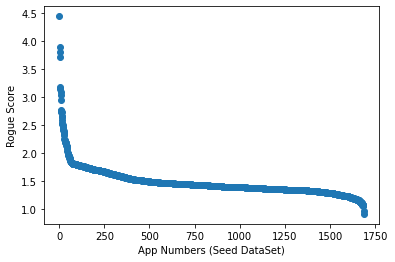

In [ ]:
#### 
plt.xlabel("App Numbers (Seed DataSet)")
plt.ylabel("Rogue Score")

plt.scatter(RogueScore.index +1,RogueScore['ROGUE'])
plt.savefig("RogueScorePlot.pdf")

In [ ]:
RogueScore.to_csv("RogueScoresTill1687Apps.csv")

In [ ]:
from numpy import matlib as mb

curve = RogueScore['ROGUE']
nPoints = len(curve)
allCoord = np.vstack((range(nPoints), curve)).T
np.array([range(nPoints), curve])
firstPoint = allCoord[0]
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
vecFromFirst = allCoord - firstPoint
scalarProduct = np.sum(vecFromFirst * mb.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
idxOfBestPoint = np.argmax(distToLine)

In [ ]:
idxOfBestPoint

74

In [ ]:
knee=curve[idxOfBestPoint]
knee

1.8086903242931933

In [ ]:
knee=1.80869

In [ ]:
RogueScore[RogueScore['ROGUE']>=knee].shape

(75, 11)

In [ ]:
RogueScore[(RogueScore['ROGUE']>=knee)&(RogueScore['OldLabel']==1)].shape

(41, 11)

In [ ]:
RogueScore[(RogueScore['ROGUE']>=knee)&(RogueScore['IPS']=="y")].shape

(26, 11)

In [ ]:
RogueScore[RogueScore['ROGUE']>=1.243888382].shape

(1561, 11)

In [ ]:
RogueScore['ROGUE'].describe()

count    1687.000000
mean        1.469443
std         0.256669
min         0.909194
25%         1.343430
50%         1.413040
75%         1.520889
max         4.442099
Name: ROGUE, dtype: float64

**CALCULATE USING LOOSE THRESHOLD**

In [ ]:
RogueScore=pd.read_csv("RogueScoresTill1687Apps.csv")

In [ ]:
RogueScore[(RogueScore['rogue_alarmingness']>=3)&(RogueScore['rogue_count']>0)].shape
Potential=RogueScore.loc[(RogueScore['rogue_count']>0),'appID']

In [ ]:
RogueScore[(RogueScore['IPS']=="y")&(RogueScore['rogue_count']>0)&(RogueScore['rogue_alarmingness']>=3)].shape

(47, 10)

In [ ]:
RogueScore[(RogueScore['OldLabel']==1)&(RogueScore['rogue_count']>0)&(RogueScore['rogue_alarmingness']>=3)].shape

(35, 10)

In [ ]:

relevant=predicted[predicted['pred_alarmingness']>=3]


In [ ]:
relevant=relevant[relevant['appID'].isin(Potential)]
relevant.sort_values(['appID','pred_alarmingness'],ascending=False,inplace=True)

In [ ]:
relevant.reset_index(drop=True,inplace=True)

In [ ]:
relevant.loc[32270,'body']

'Horrible change. I don&#39;t want to join a &#34;club&#34;. Stupid idea and an invasion of privacy. I&#39;m deleting the app now. DO NOT DOWNLOAD IF YOU VALUE YOUR PRIVACY!'

In [ ]:
RogueScore[(RogueScore['rogue_count']>0)&(RogueScore['rogue_alarmingness']>=2.5)].shape

(300, 11)

In [ ]:
relevant.loc[relevant['appID']==387771637]

In [ ]:
relevant.to_csv("RelevantReviewsOfPredictedUIA.csv")

**CHECKING ON APPS WITH GREATER THAN 0 COUNTS**

In [ ]:
NonZero=RogueScore[RogueScore['rogue_count']>0]

In [ ]:
NonZero.reset_index(drop=True,inplace=True)

(array([1.520e+02, 1.233e+03, 2.530e+02, 2.200e+01, 1.400e+01, 6.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([0.90919392, 1.26248446, 1.61577499, 1.96906553, 2.32235606,
        2.6756466 , 3.02893714, 3.38222767, 3.73551821, 4.08880874,
        4.44209928]),
 <a list of 10 Patch objects>)

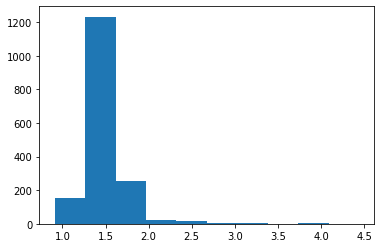

In [ ]:
plt.hist(RogueScore['ROGUE'])

In [ ]:
import numpy as np
iqr = np.quantile(NonZero['ROGUE'], q=[.25, .75])
iqr=np.diff(iqr)[0]
iqr

0.2963880757540913

In [ ]:
N=len(NonZero['ROGUE'])
bw=(2 * iqr) / np.power(N, 1/3)

datmin, datmax = NonZero['ROGUE'].min(), NonZero['ROGUE'].max()
datrng = datmax - datmin
BinNo = int((datrng / bw) + 1)

BinNo

49

(array([  2.,   1.,  18.,  47.,  90., 253., 437., 331., 140.,  85.,  91.,
         79.,  52.,   6.,  10.,   1.,   4.,   9.,   3.,   3.,   4.,   3.,
          2.,   1.,   2.,   4.,   0.,   0.,   1.,   1.,   1.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([0.90919392, 0.98129403, 1.05339414, 1.12549425, 1.19759436,
        1.26969447, 1.34179458, 1.41389469, 1.4859948 , 1.55809491,
        1.63019502, 1.70229513, 1.77439523, 1.84649534, 1.91859545,
        1.99069556, 2.06279567, 2.13489578, 2.20699589, 2.279096  ,
        2.35119611, 2.42329622, 2.49539633, 2.56749644, 2.63959655,
        2.71169665, 2.78379676, 2.85589687, 2.92799698, 3.00009709,
        3.0721972 , 3.14429731, 3.21639742, 3.28849753, 3.36059764,
        3.43269775, 3.50479786, 3.57689797, 3.64899807, 3.72109818,
        3.79319829, 3.8652984 , 3.93739851, 4.00949862, 4.08159873,
        4.15369884, 4.22579895, 4.29789906, 4.369999

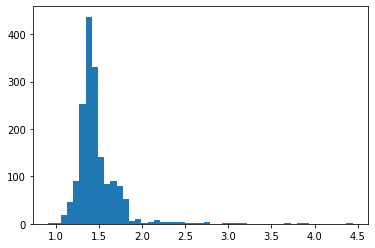

In [ ]:
plt.hist(RogueScore['ROGUE'],bins=49)

In [ ]:
NonZero[NonZero['ROGUE']>=1.8].shape

(83, 11)

In [ ]:
NonZero[NonZero['ROGUE']>=1.7].shape
NonZero[(NonZero['ROGUE']>=1.7)&(NonZero['OldLabel']==1)].shape

(59, 11)

In [ ]:
NonZero[NonZero['ROGUE']>=1.6].shape

NonZero[(NonZero['ROGUE']>=1.6)&(NonZero['OldLabel']==1)].shape

(75, 11)